In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib as joblib

In [10]:
dataset = pd.read_csv("train.csv")
pd.set_option("display.max_columns", None)
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
numerical_feature = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(dataset[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in dataset.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 5
Discrete feature Count 2
Continuous feature Count 3
Categorical feature Count 8


In [12]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
dataset.shape

(614, 13)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)

In [16]:
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)

In [17]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)

In [18]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)

<AxesSubplot:>

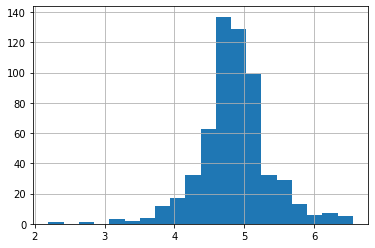

In [19]:
# Perform log transformation of TLoanAmount to make it closer to normal
dataset['Loanamt_log']=np.log(dataset['LoanAmount'])
# Histogram of variable LoanAmount
dataset['Loanamt_log'].hist(bins=20)

In [20]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
dataset['TotalIncome']= dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
# Perform log transformation of TotalIncome to make it closer to normal
dataset['TotalIncome_log']= np.log(dataset['TotalIncome'])

<AxesSubplot:>

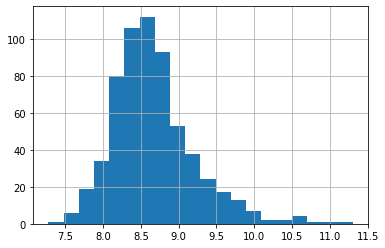

In [21]:
# Looking at the distribtion of TotalIncome
dataset['TotalIncome_log'].hist(bins=20)

In [22]:

# Impute missing values for LoanAmount
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.Loanamt_log = dataset.Loanamt_log.fillna(dataset.Loanamt_log.mean())

In [23]:
# Impute missing values for Loan_Amount_Term
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)

In [24]:
# Impute missing values for Credit_History
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [25]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Loanamt_log          0
TotalIncome          0
TotalIncome_log      0
dtype: int64

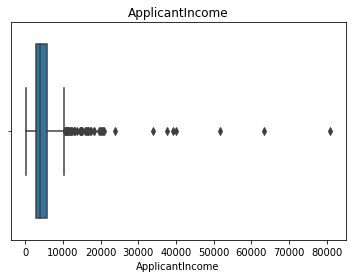

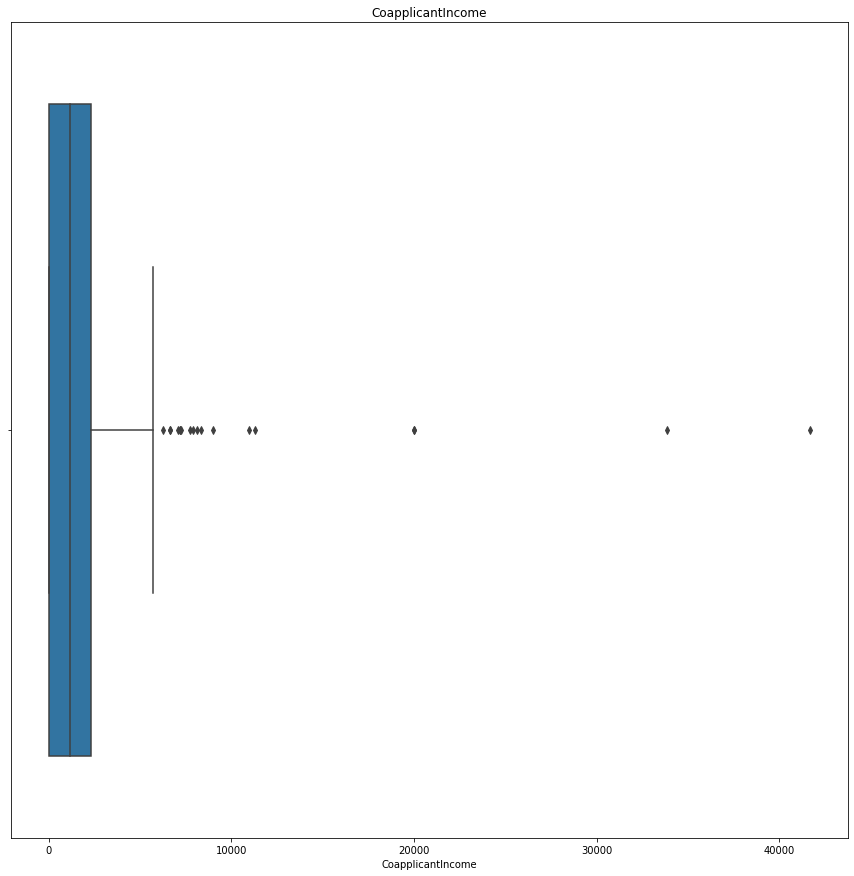

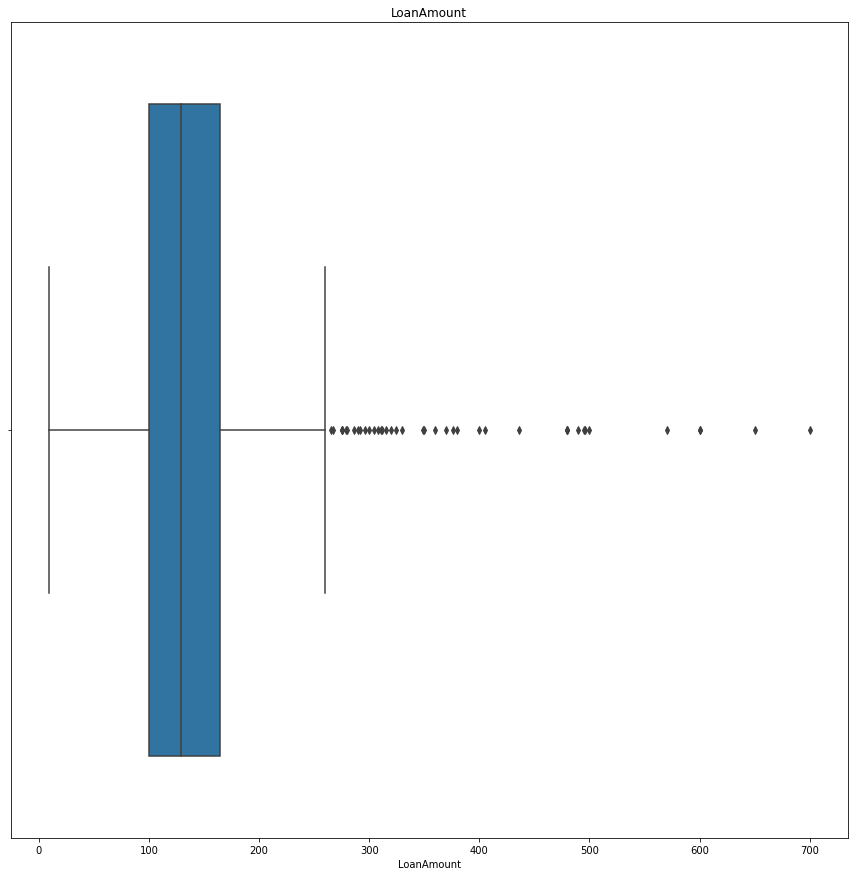

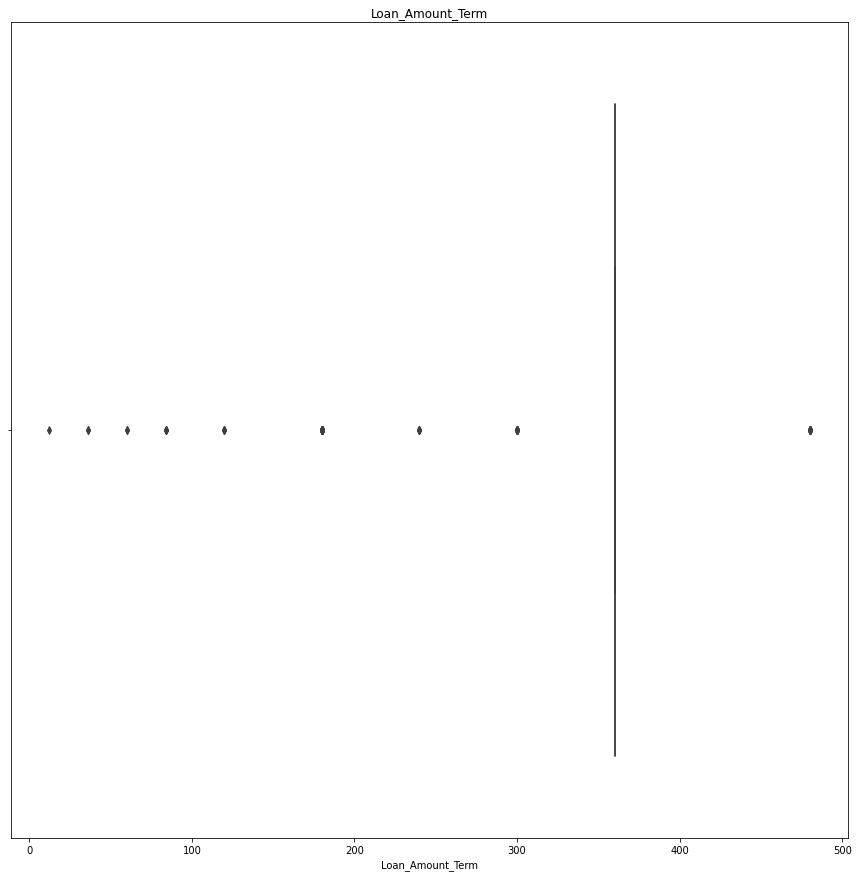

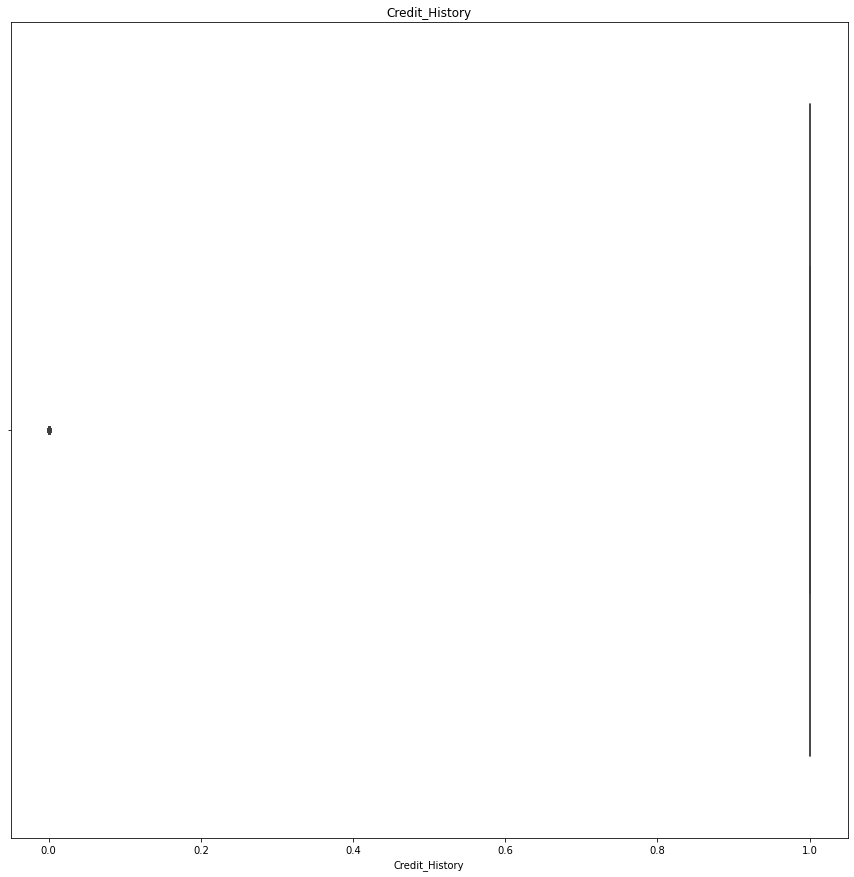

<Figure size 1080x1080 with 0 Axes>

In [27]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in numerical_feature:
    data=dataset.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

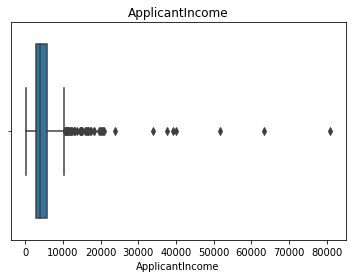

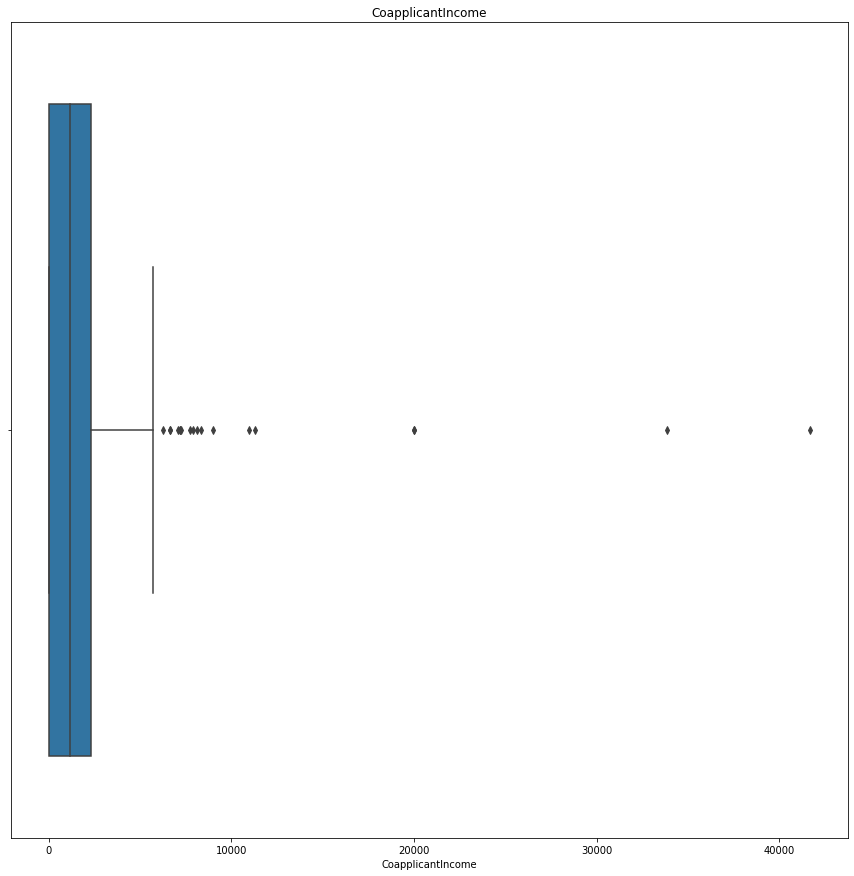

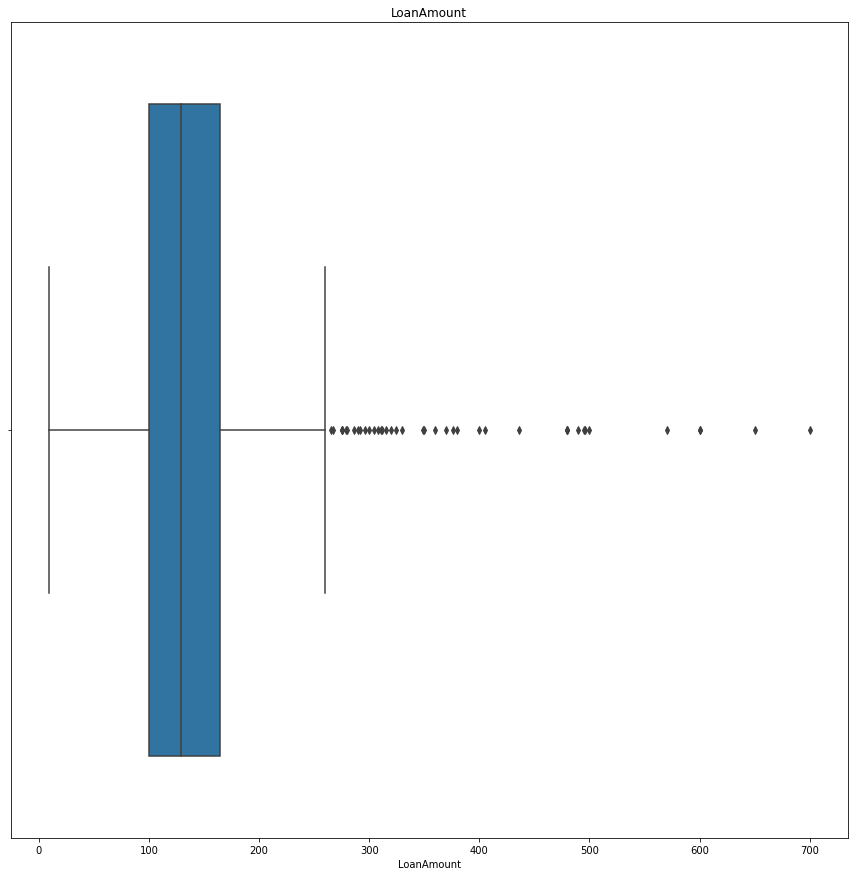

<Figure size 1080x1080 with 0 Axes>

In [26]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=dataset.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [28]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanamt_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


In [31]:
gender=dataset['Gender'].replace(['Male','Female'],[0,1])

In [32]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanamt_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


In [33]:
dataset['Gender']=gender

In [34]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanamt_log,TotalIncome,TotalIncome_log
0,LP001002,0,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,0,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,0,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,0,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,0,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,0,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,0,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


In [1]:
married=dataset['Married'].replace(['No','Yes'],[0,1])
dataset['Married']=married

NameError: name 'dataset' is not defined

In [37]:
edu=dataset['Education'].replace(['Graduate','Not Graduate'],[1,0])
dataset['Education']=edu

In [38]:
selfe=dataset['Self_Employed'].replace(['No','Yes'],[0,1])
dataset['Self_Employed']=selfe

In [39]:
prop=dataset['Property_Area'].replace(['Urban','Semiurban','Rural'],[2,1,0])
dataset['Property_Area']=prop

In [42]:
status=dataset['Loan_Status'].replace(['N','Y'],[0,1])
dataset['Loan_Status']=status


In [46]:
dep=dataset['Dependents'].replace(['0','1','2','3+'],[0,1,2,3])
dataset['Dependents']=dep

In [47]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanamt_log,TotalIncome,TotalIncome_log
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.857444,5849.0,8.674026
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
Loanamt_log          614 non-null float64
TotalIncome          614 non-null float64
TotalIncome_log      614 non-null float64
dtypes: float64(7), int64(7), object(2)
memory usage: 76.9+ KB


In [48]:
X = dataset.drop(["Loan_ID","Loan_Status","LoanAmount","TotalIncome","TotalIncome_log"], axis=1)
Y = dataset["Loan_Status"]

In [49]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loanamt_log
0,0,0,0,1,0,5849,0.0,360.0,1.0,2,4.857444
1,0,1,1,1,0,4583,1508.0,360.0,1.0,0,4.852030
2,0,1,0,1,1,3000,0.0,360.0,1.0,2,4.189655
3,0,1,0,0,0,2583,2358.0,360.0,1.0,2,4.787492
4,0,0,0,1,0,6000,0.0,360.0,1.0,2,4.948760
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,360.0,1.0,0,4.262680
610,0,1,3,1,0,4106,0.0,180.0,1.0,0,3.688879
611,0,1,1,1,0,8072,240.0,360.0,1.0,2,5.533389
612,0,1,2,1,0,7583,0.0,360.0,1.0,2,5.231109


In [50]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [2]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(X_train)
x_test=ss.fit_transform(X_test)

ModuleNotFoundError: No module named 'sklearn'

In [69]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({1: 337, 0: 154})
The number of classes after fit Counter({1: 337, 0: 337})


In [58]:
sm=SMOTE(random_state=0)
X_test_res, y_test_res = sm.fit_resample(x_test, y_test)
print("The number of classes before fit {}".format(Counter(y_test)))
print("The number of classes after fit {}".format(Counter(y_test_res)))

The number of classes before fit Counter({1: 85, 0: 38})
The number of classes after fit Counter({1: 85, 0: 85})


In [78]:
#checking accuracy for Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
DTClassifier= DecisionTreeClassifier(criterion='entropy',max_depth=4)
#Training the model
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [79]:
#predicting the values of x_test
y_pred= DTClassifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [80]:
#calculating accuracy for decision tree algorithm
from sklearn import metrics
print('The accuracy of decision tree is : ',metrics.accuracy_score(y_pred,y_test))

The accuracy of decision tree is :  0.8048780487804879


In [84]:
cat=CatBoostClassifier(eval_metric="Accuracy",n_estimators=18000)
cat.fit(x_train,y_train)

Learning rate set to 0.000537
0:	learn: 0.8167006	total: 1.94ms	remaining: 34.9s
1:	learn: 0.8167006	total: 4.57ms	remaining: 41.1s
2:	learn: 0.8167006	total: 6.29ms	remaining: 37.7s
3:	learn: 0.8126273	total: 7.71ms	remaining: 34.7s
4:	learn: 0.8105906	total: 9.21ms	remaining: 33.1s
5:	learn: 0.8126273	total: 10.7ms	remaining: 32s
6:	learn: 0.8105906	total: 11.8ms	remaining: 30.5s
7:	learn: 0.8105906	total: 13.7ms	remaining: 30.7s
8:	learn: 0.8105906	total: 15.5ms	remaining: 30.9s
9:	learn: 0.8105906	total: 17.8ms	remaining: 31.9s
10:	learn: 0.8105906	total: 18.7ms	remaining: 30.5s
11:	learn: 0.8105906	total: 20.1ms	remaining: 30.1s
12:	learn: 0.8105906	total: 21.5ms	remaining: 29.8s
13:	learn: 0.8105906	total: 23ms	remaining: 29.5s
14:	learn: 0.8105906	total: 24.5ms	remaining: 29.3s
15:	learn: 0.8105906	total: 26ms	remaining: 29.2s
16:	learn: 0.8105906	total: 27.5ms	remaining: 29.1s
17:	learn: 0.8105906	total: 29.1ms	remaining: 29.1s
18:	learn: 0.8105906	total: 31.2ms	remaining: 29.5

In [85]:
y_pred = cat.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[20 18]
 [ 2 83]]
0.8373983739837398
              precision    recall  f1-score   support

           0       0.91      0.53      0.67        38
           1       0.82      0.98      0.89        85

    accuracy                           0.84       123
   macro avg       0.87      0.75      0.78       123
weighted avg       0.85      0.84      0.82       123



In [86]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(x_train, y_train)
print("Accuracy is", model.score(x_test, y_test)*100)


Accuracy is 82.11382113821138


In [87]:
joblib.dump(cat,"catfm.pkl")

['catfm.pkl']

In [88]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanamt_log,TotalIncome,TotalIncome_log
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.857444,5849.0,8.674026
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664
